In [1]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def loadCaffeModels():
    face_net = cv2.dnn.readNet('deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel')
    return face_net

In [3]:
def loadImage(img_path):
    # image loading
    img = cv2.imread(img_path)
    return img

In [4]:
def anonymize_face_simple(image, factor=3.0):
    (h, w) = image.shape[:2]
    kW = int(w / factor)
    kH = int(h / factor)

    # ensure the width of the kernel is odd
    if kW % 2 == 0:
        kW -= 1

    # ensure the height of the kernel is odd
    if kH % 2 == 0:
        kH -= 1

    # apply a Gaussian blur to the input image using our computed
    # kernel size
    return cv2.GaussianBlur(image, (kW, kH), 0)

In [5]:
def anonymize_face_pixelate(image, blocks=3):
    # divide the input image into NxN blocks
    (h, w) = image.shape[:2]
    xSteps = np.linspace(0, w, blocks + 1, dtype="int")
    ySteps = np.linspace(0, h, blocks + 1, dtype="int")

    # loop over the blocks in both the x and y direction
    for i in range(1, len(ySteps)):
        for j in range(1, len(xSteps)):
            startX = xSteps[j - 1]
            startY = ySteps[i - 1]
            endX = xSteps[j]
            endY = ySteps[i]

            roi = image[startY:endY, startX:endX]
            (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
            cv2.rectangle(image, (startX, startY), (endX, endY),
                (B, G, R), -1)

    # return the pixelated blurred image
    return image

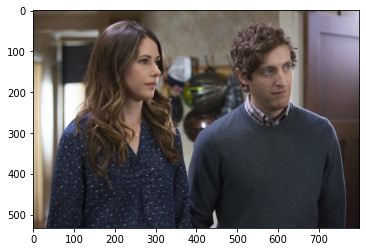

In [6]:
image = loadImage("asset/input/input.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [7]:
#To blur the face
orig1 = image.copy()
(h, w) = image.shape[:2]

# construct a blob from the image
blob = cv2.dnn.blobFromImage(orig1, 1.0, (300, 300), (104.0, 177.0, 123.0))

net = loadCaffeModels()
# pass the blob through the network and obtain the face detections
net.setInput(blob)
detections = net.forward()
conf_threshold = 0.7

# loop over the detections
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        startX=int(detections[0,0,i,3]*w)
        startY=int(detections[0,0,i,4]*h)
        endX=int(detections[0,0,i,5]*w)
        endY=int(detections[0,0,i,6]*h)
        face = orig1[startY:endY, startX:endX]
        
        face = anonymize_face_simple(face)

        # store the blurred face in the output image
        orig1[startY:endY, startX:endX] = face


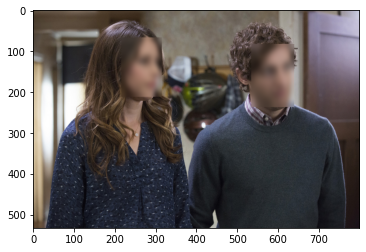

In [8]:
plt.imshow(cv2.cvtColor(orig1, cv2.COLOR_BGR2RGB))

In [9]:
#To pixelate the face
orig2 = image.copy()
(h, w) = image.shape[:2]

# construct a blob from the image
blob = cv2.dnn.blobFromImage(orig2, 1.0, (300, 300), (104.0, 177.0, 123.0))

net = loadCaffeModels()
# pass the blob through the network and obtain the face detections
net.setInput(blob)
detections = net.forward()
conf_threshold = 0.7

# loop over the detections
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        startX=int(detections[0,0,i,3]*w)
        startY=int(detections[0,0,i,4]*h)
        endX=int(detections[0,0,i,5]*w)
        endY=int(detections[0,0,i,6]*h)
        face = orig2[startY:endY, startX:endX]
        
        face = anonymize_face_pixelate(face)

        # store the blurred face in the output image
        orig2[startY:endY, startX:endX] = face


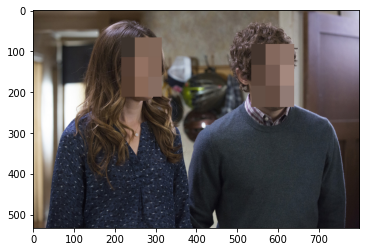

In [10]:
plt.imshow(cv2.cvtColor(orig2, cv2.COLOR_BGR2RGB))